In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import random

# Load dataset (you can upload the dataset file in Colab or use a link to load it)
# In Colab: use `from google.colab import files` and `files.upload()` to upload your CSV
file_path = 'wine_dataset.csv'  # Adjust to your file path
data = pd.read_csv(file_path)

# Show the first few rows to check the data
data.head()

# Select relevant features for clustering
features = ['Alcohol', 'Malic_Acid', 'Total_Phenols', 'Flavanoids', 'Color_Intensity']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])


KMeans Initial Clusters:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2
 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 0 0 2 0 0 0 0 2 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
KMeans Final Clusters after 6 epochs:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2
 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 0 0 2 0 0 0 0 2 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
KMeans Error Rate: 373.73369132620974


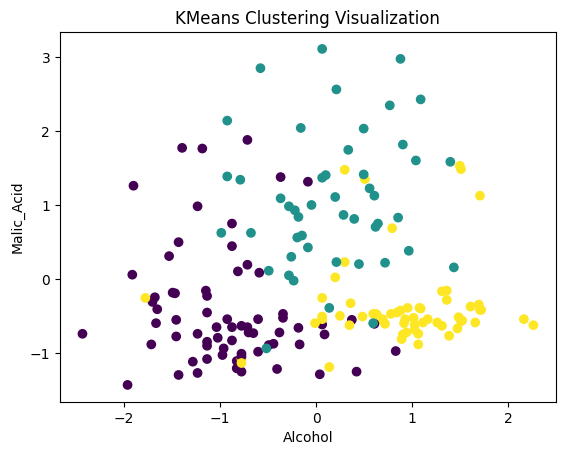

In [ ]:
# Implement KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)
kmeans.fit(scaled_data)

# Initial Clusters
initial_clusters_kmeans = kmeans.labels_
print("KMeans Initial Clusters:\n", initial_clusters_kmeans)

# Final clusters after a set number of epochs
epochs_kmeans = kmeans.n_iter_
final_clusters_kmeans = kmeans.labels_
print(f"KMeans Final Clusters after {epochs_kmeans} epochs:\n", final_clusters_kmeans)

# Error rate (inertia)
error_rate_kmeans = kmeans.inertia_
print(f"KMeans Error Rate: {error_rate_kmeans}")

# Visualize KMeans Clustering
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=final_clusters_kmeans, cmap='viridis')
plt.title("KMeans Clustering Visualization")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()


Agglomerative Clustering Final Clusters:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 0 0 2 0 0 2 0 2 2 0 0 0
 2 2 2 2 2 0 2 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 1 0 2 0 0 0 0 2 0 2 2 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


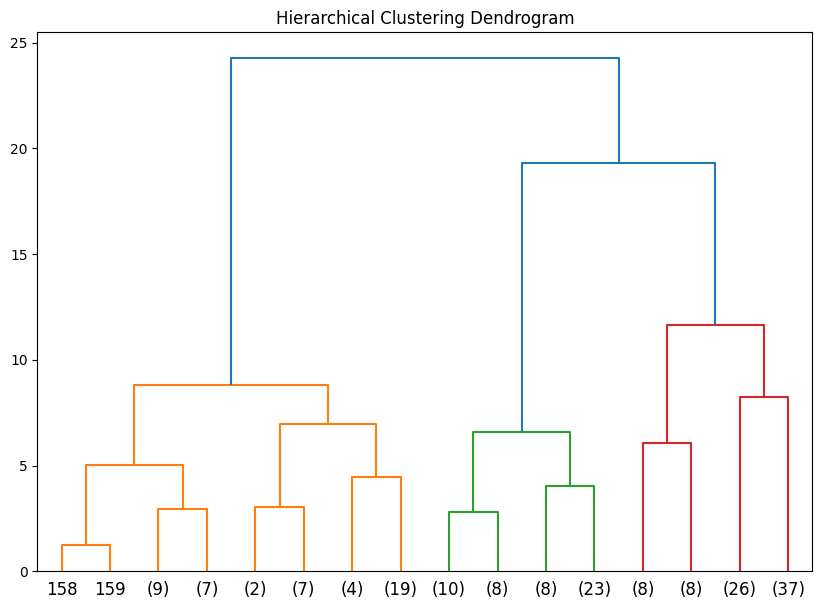

In [ ]:
# Implement Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo.fit(scaled_data)

# Final Clusters
final_clusters_agglo = agglo.labels_
print(f"Agglomerative Clustering Final Clusters:\n", final_clusters_agglo)

# Visualize Agglomerative Clustering Dendrogram
Z = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=3, labels=data.index)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


In [ ]:
class QLearningWine:
    def __init__(self, data, cluster, n_wines=10):
        self.data = data
        self.cluster = cluster
        self.n_wines = n_wines
        self.q_table = {}  # Initialize Q-table for state-action pairs

    def initialize_q_table(self):
        """Initialize Q-table for each wine with random Q-values."""
        for wine_id in self.data.index:
            self.q_table[wine_id] = random.uniform(0, 1)  # Random Q-value initialization

    def update_q_value(self, wine_id, reward, learning_rate=0.1, discount_factor=0.95):
        """Update Q-values using the Q-learning formula."""
        old_q_value = self.q_table[wine_id]
        max_next_q = max(self.q_table.values())  # Max future reward
        # Q-learning update rule
        self.q_table[wine_id] = old_q_value + learning_rate * (reward + discount_factor * max_next_q - old_q_value)

    def generate_playlist(self):
        """Generate a playlist of top wines using Q-learning."""
        self.initialize_q_table()
        selected_wines = []

        for _ in range(self.n_wines):
            # Select wine with max Q-value in the cluster
            cluster_wines = self.data[final_clusters_kmeans == self.cluster].index
            best_wine_id = max(cluster_wines, key=lambda x: self.q_table[x])
            selected_wines.append(best_wine_id)

            # Simulate user feedback (like = +1 reward, dislike = -1 reward)
            feedback = random.choice([1, -1])  # Simulated feedback
            self.update_q_value(best_wine_id, reward=feedback)

        # Return features of the selected wines
        recommendations = self.data.loc[selected_wines][features]
        return recommendations


In [ ]:
# Example usage for Q-learning wine recommendation
cluster_num = 1  # Choose the cluster for which you want to generate recommendations (0, 1, or 2)
q_learning_wine = QLearningWine(data, cluster_num)
q_learning_recommendations = q_learning_wine.generate_playlist()
print("Wine Recommendations using Q-Learning:\n", q_learning_recommendations)


Wine Recommendations using Q-Learning:
      Alcohol  Malic_Acid  Total_Phenols  Flavanoids  Color_Intensity
149    13.08        3.90           1.41        1.39             9.40
157    12.45        3.03           1.90        0.58             7.50
157    12.45        3.03           1.90        0.58             7.50
166    13.45        3.70           1.70        0.92            10.68
166    13.45        3.70           1.70        0.92            10.68
166    13.45        3.70           1.70        0.92            10.68
166    13.45        3.70           1.70        0.92            10.68
166    13.45        3.70           1.70        0.92            10.68
166    13.45        3.70           1.70        0.92            10.68
166    13.45        3.70           1.70        0.92            10.68


   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

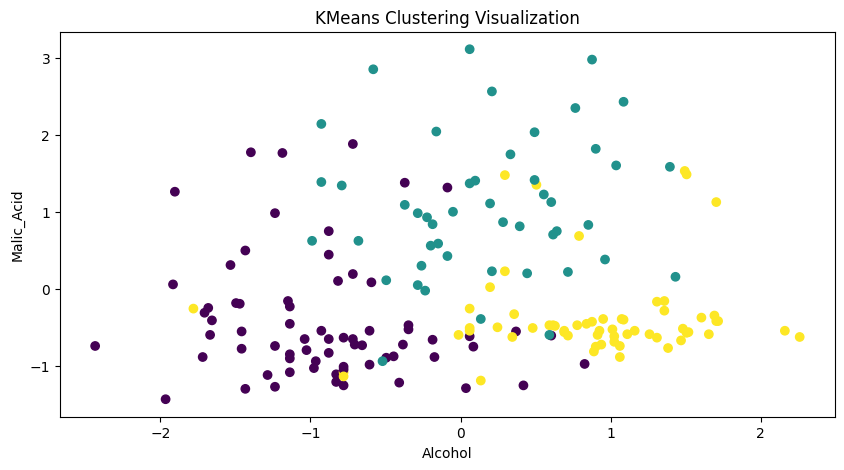

GMM Initial Clusters:
 [2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 0 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 2 0 0 0 0 0 0 0 0 2 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 0 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
GMM Final Clusters after 15 epochs:
 [2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 0 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 2 0 0 0 0 0 0 0 0 2 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 0 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
GMM Error Rate (negative log-likelihood): 4.782310761551181


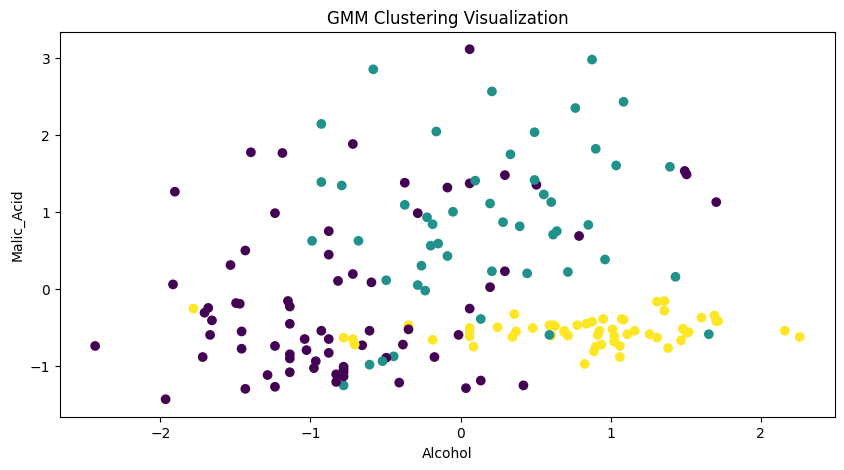

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Load dataset (you can upload the dataset file in Colab or use a link to load it)
# In Colab: use `from google.colab import files` and `files.upload()` to upload your CSV
file_path = 'wine_dataset.csv'  # Adjust to your file path
data = pd.read_csv(file_path)

# Show the first few rows to check the data
print(data.head())

# Select relevant features for clustering
features = ['Alcohol', 'Malic_Acid', 'Total_Phenols', 'Flavanoids', 'Color_Intensity']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# ----------------------------------------------
# 1. KMeans Clustering Implementation

kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)
kmeans.fit(scaled_data)
# ----------------------------------------------

# Implement KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)
kmeans.fit(scaled_data)

# Initial Clusters
initial_clusters_kmeans = kmeans.labels_
print("KMeans Initial Clusters:\n", initial_clusters_kmeans)

# Final clusters after a set number of epochs
epochs_kmeans = kmeans.n_iter_
final_clusters_kmeans = kmeans.labels_
print(f"KMeans Final Clusters after {epochs_kmeans} epochs:\n", final_clusters_kmeans)

# Error rate (inertia)
error_rate_kmeans = kmeans.inertia_
print(f"KMeans Error Rate: {error_rate_kmeans}")

# Visualize KMeans Clustering
plt.figure(figsize=(10, 5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=final_clusters_kmeans, cmap='viridis')
plt.title("KMeans Clustering Visualization")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

# ----------------------------------------------
# 2. Gaussian Mixture Model (GMM) Clustering Implementation
gmm = GaussianMixture(n_components=3, max_iter=100, random_state=42)
gmm.fit(scaled_data)

# ----------------------------------------------

# Implement Gaussian Mixture Model (GMM) Clustering
gmm = GaussianMixture(n_components=3, max_iter=100, random_state=42)
gmm.fit(scaled_data)

# Initial Clusters
initial_clusters_gmm = gmm.predict(scaled_data)
print("GMM Initial Clusters:\n", initial_clusters_gmm)

# Final clusters after the specified number of iterations (epochs)
epochs_gmm = gmm.n_iter_
final_clusters_gmm = gmm.predict(scaled_data)
print(f"GMM Final Clusters after {epochs_gmm} epochs:\n", final_clusters_gmm)

# Error rate (Log-likelihood or negative log-likelihood as GMM score)
error_rate_gmm = -gmm.score(scaled_data)
print(f"GMM Error Rate (negative log-likelihood): {error_rate_gmm}")

# Visualize GMM Clustering
plt.figure(figsize=(10, 5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=final_clusters_gmm, cmap='viridis')
plt.title("GMM Clustering Visualization")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import random
from google.colab import files

# Upload dataset
uploaded = files.upload()

# Update file path with the uploaded file name
file_path = list(uploaded.keys())[0]
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Data Head:\n", data.head())

# Select relevant features for clustering
features = ['Alcohol', 'Malic_Acid', 'Total_Phenols', 'Flavanoids', 'Color_Intensity']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# ----------------------------------------------
# 1. KMeans Clustering Implementation
# ----------------------------------------------

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)
kmeans.fit(scaled_data)

# Final clusters
final_clusters_kmeans = kmeans.labels_

# ----------------------------------------------
# 2. Q-learning Based Recommendation System
# ----------------------------------------------

class QLearningWineRecommender:
    def __init__(self, data, cluster, n_wines=5, learning_rate=0.1, discount_factor=0.95):
        self.data = data
        self.cluster = cluster
        self.n_wines = n_wines
        self.q_table = pd.DataFrame(0, index=self.data.index, columns=['Q_value'])  # Initialize Q-table with zeros
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor

    def select_wine(self):
        """Select wine based on max Q-value (epsilon-greedy strategy)."""
        cluster_wines = self.data[final_clusters_kmeans == self.cluster].index

        # Check if there are any wines in the selected cluster
        if len(cluster_wines) == 0:
            raise ValueError(f"No wines available in cluster {self.cluster}. Please choose another cluster.")

        # 20% chance to explore
        if random.uniform(0, 1) < 0.2:
            return random.choice(cluster_wines)
        else:
            # Exploit the best-known Q-value with a fallback to random choice
            max_q_value_indices = self.q_table.loc[cluster_wines].idxmax()
            if pd.isna(max_q_value_indices):
                return random.choice(cluster_wines)
            return max_q_value_indices

    def update_q_value(self, wine_id, reward):
        """Update the Q-value based on the received reward."""
        old_q_value = self.q_table.at[wine_id, 'Q_value']
        # Assume max future reward is the max Q-value of the other wines in the cluster
        future_q_value = self.q_table.loc[self.data[final_clusters_kmeans == self.cluster].index]['Q_value'].max()
        # Q-learning update formula
        self.q_table.at[wine_id, 'Q_value'] = old_q_value + self.learning_rate * (reward + self.discount_factor * future_q_value - old_q_value)

    def generate_recommendations(self):
        """Generate recommendations using Q-learning."""
        recommendations = []
        for _ in range(self.n_wines):
            wine_id = self.select_wine()
            recommendations.append(wine_id)

            # Simulate user feedback (like = +1 reward, dislike = -1 reward)
            feedback = random.choice([1, -1])  # Simulated feedback
            self.update_q_value(wine_id, feedback)

        return self.data.loc[recommendations][features]

# Example usage
user_input_cluster = int(input("Enter cluster number (0, 1, or 2) to generate wine recommendations: "))
q_learning_recommender = QLearningWineRecommender(data, user_input_cluster)
try:
    recommendations = q_learning_recommender.generate_recommendations()
    print(f"\nGenerated Recommendations for Cluster {user_input_cluster}:\n", recommendations)
except ValueError as e:
    print(e)


TypeError: 'NoneType' object is not subscriptable

Saving wine_dataset.csv to wine_dataset (10).csv


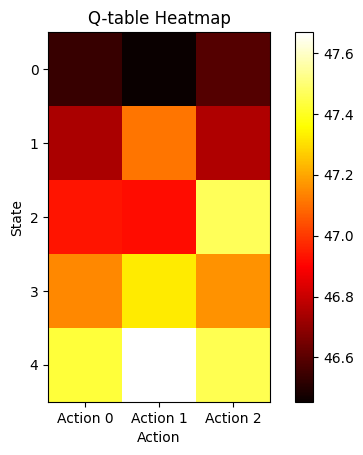

Recommended action for state 72: 1


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from google.colab import files

# Function to upload the CSV file
def upload_data():
    uploaded = files.upload()
    return next(iter(uploaded))

# Function to normalize the dataset
def normalize_data(data):
    return (data - data.min()) / (data.max() - data.min())

# Function to discretize continuous features into states
def discretize_state(state, num_states):
    return np.clip((state * num_states).astype(int), 0, num_states - 1)

# Function to choose an action using epsilon-greedy policy
def choose_action(state_index, q_table, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.randint(0, num_actions - 1)  # Explore
    else:
        return np.argmax(q_table[state_index])  # Exploit

# Function to train the SARSA agent
def train_sarsa(normalized_data, num_episodes, learning_rate, discount_factor):
    # Create a Q-table with shape based on num_states and num_actions
    q_table = np.zeros((num_states, num_actions))

    for episode in range(num_episodes):
        state_idx = random.randint(0, normalized_data.shape[0] - 1)
        current_state = discretize_state(normalized_data.iloc[state_idx].values, num_states)
        epsilon = max(0.1, 1.0 - episode / (num_episodes / 2))
        action = choose_action(current_state[0], q_table, epsilon)  # Use the first dimension for indexing

        done = False
        while not done:
            next_state_idx = (state_idx + 1) % normalized_data.shape[0]
            next_state = discretize_state(normalized_data.iloc[next_state_idx].values, num_states)
            reward = normalized_data.iloc[next_state_idx, 0]  # Reward from the first feature
            next_action = choose_action(next_state[0], q_table, epsilon)

            # Update Q-value
            current_q = q_table[current_state[0], action]  # Using first state dimension
            next_q = q_table[next_state[0], next_action]
            q_table[current_state[0], action] = current_q + learning_rate * (reward + discount_factor * next_q - current_q)

            current_state = next_state
            action = next_action
            state_idx = next_state_idx

            if next_state_idx == normalized_data.shape[0] - 1:
                done = True

    return q_table

# Function to visualize the Q-table for a specific action
def visualize_q_table(q_table):
    plt.imshow(q_table, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title("Q-table Heatmap")
    plt.xlabel("Action")
    plt.ylabel("State")
    plt.xticks(ticks=range(num_actions), labels=[f"Action {i}" for i in range(num_actions)])
    plt.show()

# Function to recommend wine based on a continuous state
def recommend_wine(continuous_state, q_table):
    discrete_state = discretize_state(continuous_state, num_states)
    return np.argmax(q_table[discrete_state[0]])

# Main function to execute the program
def main():
    # Step 1: Upload and load the dataset
    file_name = upload_data()
    data = pd.read_csv(file_name)

    # Step 2: Normalize the dataset
    normalized_data = normalize_data(data)

    # Step 3: Set hyperparameters
    global num_states, num_actions
    num_states = 5  # Number of discrete states
    num_actions = 3  # Number of actions (e.g., Recommend, No recommendation, Explore)
    learning_rate = 0.1
    discount_factor = 0.99
    num_episodes = 1000  # Number of episodes for training

    # Step 4: Train the agent
    q_table = train_sarsa(normalized_data, num_episodes, learning_rate, discount_factor)

    # Step 5: Visualize the Q-table
    visualize_q_table(q_table)

    # Example recommendation
    random_index = random.randint(0, normalized_data.shape[0] - 1)
    recommended_action = recommend_wine(normalized_data.iloc[random_index].values, q_table)
    print(f"Recommended action for state {random_index}: {recommended_action}")

# Execute the main function
if __name__ == "__main__":
    main()


In [ ]:
# Install necessary libraries
!pip install numpy pandas matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
from google.colab import files
uploaded = files.upload()

# Read the CSV file into a DataFrame
df = pd.read_csv("wine_dataset.csv")

# Normalize the dataset
def normalize_data(data):
    return (data - data.min()) / (data.max() - data.min())

normalized_data = normalize_data(df.values)

# Define SARSA parameters
num_actions = 3  # Example actions: 0, 1, 2 (for different types of recommendations)
num_states = 5   # Discretize the state space into 5 states
num_episodes = 1000
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1

# Initialize Q-table
q_table = np.zeros((num_states, num_actions))

# Function to discretize the state
def discretize_state(state):
    # Ensure the state is a 1D array and is normalized
    return np.clip(np.digitize(state, bins=np.linspace(0, 1, num_states + 1)) - 1, 0, num_states - 1)

# Choose an action based on epsilon-greedy strategy
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.randint(num_actions)  # Explore
    else:
        return np.argmax(q_table[state])  # Exploit

# Train the SARSA agent
def train_sarsa(normalized_data):
    for episode in range(num_episodes):
        # Start from a random state
        state = normalized_data[np.random.randint(len(normalized_data))]
        state_idx = discretize_state(state)
        action = choose_action(state_idx)

        while True:
            # Simulate environment feedback (reward)
            reward = np.random.rand()  # Example reward function

            # Select next state and action
            next_state = normalized_data[np.random.randint(len(normalized_data))]
            next_state_idx = discretize_state(next_state)
            next_action = choose_action(next_state_idx)

            # Update Q-value
            current_q = q_table[state_idx, action]
            next_q = q_table[next_state_idx, next_action]
            q_table[state_idx, action] += learning_rate * (reward + discount_factor * next_q - current_q)

            state_idx = next_state_idx
            action = next_action

            # Break if a certain condition is met
            if np.random.rand() < 0.1:  # Random condition to end the loop
                break

        if episode % 100 == 0:
            print(f"Episode {episode} complete.")

# Function to recommend wine based on a state
def recommend_wine(state):
    return np.argmax(q_table[state])

# Execute training
train_sarsa(normalized_data)

# Test the recommendation system
test_state = discretize_state(normalized_data[np.random.randint(len(normalized_data))])
recommended_action = recommend_wine(test_state)

print(f"Recommended action for state {test_state}: {recommended_action}")

# Visualize Q-table
plt.imshow(q_table, cmap='hot', interpolation='nearest')
plt.title('Q-Table Heatmap')
plt.xlabel('Action')
plt.ylabel('State')
plt.colorbar()
plt.show()
